# <font color = 'blue'> Como fazer o download automático de dados do Instituto Nacional de Meteorologia - INMET </font>

<font color = 'blue'> Observações: </font>

<p style='text-align: justify;'> 

1. O INMET tem como uma de suas atribuições coordenar e operar as redes de observações meteorológicas e de transmissão de dados. No seu banco de dados público, o INMET incorpora informações com discretização diária (estações convencionais) coletadas desde 1961, e discretização horária (estações automáticas) coletadas a partir de 2000;
    

2. São disponibilizados dados de: temperatura, umidade relativa do ar, direção e velocidade do vento, pressão atmosférica, precipitação, entre outras variáveis;
    

3. Neste tutorial será realizado o download de dados do Pantanal.</p>

<font color = 'blue'> Instalações necessárias: </font>

**1º) GeoPandas:** conda install -c conda-forge geopandas

**2º) Shapely:** conda install -c conda-forge shapely

**3º) Numpy:** conda install -c anaconda numpy

**4º) Plotly:** conda install -c plotly plotly=4.14.3

**5º) Requests:** conda install -c anaconda requests 

**6º) tqdm:** conda install -c conda-forge tqdm

**7º) HydroBR:** pip install hydrobr

<font color = 'blue'> Roteiro a ser seguido: </font>


1º) Seleção de estações do INMET a partir de um shapefile de área de interesse;

2º) Abordagem para download dos dados das estações baixadas;

3º) Visualização da disponibilidade temporal dos dados.

# 1. Selecionando as estações do INMET

In [13]:
# Importar as bibliotecas:
import hydrobr
import geopandas as gpd
from shapely.geometry import Point

In [14]:
# Informações importantes sobre a função "select_station_area":
# Possibilidade de selecionar um valor de buffer no momento da seleção das estações.

def select_stations_area(area, list_stations, buffer=0):
    """
    Seleciona as estações que estão dentro de uma área de interesse.
    :param area: Área de interesse como um objeto GeoPandas
    :param list_stations: Lista de estações como objeto geopandas
    :param buffer: Float, Opcional, Padrão = 0 - Buffer na área de interesse
    :return: Retorna um objeto Geopandas com as estações selecionadas
    """
    #Converte o formato das colunas Latitude e Longitude
    if list_stations.Longitude.dtype != float:
        list_stations.Longitude = list_stations.Longitude.astype(float)
    if list_stations.Latitude.dtype != float:
        list_stations.Latitude = list_stations.Latitude.astype(float)   
    
    # Cria uma Geometria de Pontos
    pontos=[Point(x) for x in zip(list_stations.Longitude,list_stations.Latitude)]
    crs={'proj':'latlong','ellps':'WGS84','datum':'WGS84','no_def':True} #SC WGS 84
    
    # Define o sistema de coordenadas como WGS 84
    list_stations=gpd.GeoDataFrame(list_stations,crs=crs,geometry=pontos)
    
    # Seleciona as estações que estão dentro da bacia
    list_stations = list_stations[list_stations.geometry.within(area.geometry[0].buffer(buffer))]
    return list_stations

<AxesSubplot:>

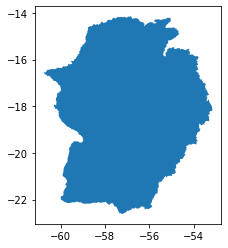

In [15]:
# Abrir o shapefile da área de interesse e plotar:
area_pantanal = gpd.read_file(r'shapefiles_pantanal/limite_BAP_1.shp')
area_pantanal.plot()

<p style='text-align: justify;'> 
    
<font color = 'blue'> O INMET possui dois tipos de estações: </font>

**1 - Automáticas:** apresentam discretização horária, delas podem ser obtidos dados tanto no formato horário quanto diário; e

**2 - Convencionais:** só podem ser obtidos dados no formato diário.


A função da biblioteca HydroBR responsável pela obtenção do inventário do INMET é a <font color = 'teal'> hydrobr.get_data.INMET.list_stations()</font>.


A função **".list_stations"** apresenta como argumento a variável **"station_type"** com argumento padrão **"both"**. Isso significa que ao chamar a função **".list_stations"**, por padrão, ela retornará o inventário que contém as estações automáticas e convencionais. No entanto, podemos selecionar apenas um tipo de estação. Em resumo:

<ul>
<li> <font color = 'teal'>"hydrobr.get_data.INMET.list_stations()"</font>:</li>Para obter o inventário com as estações automáticas e convencionais;
    

<li> <font color = 'teal'>"hydrobr.get_data.INMET.list_stations(station_type='automatic')"</font>:</li>Para obter o inventário com apenas as estações automaticas.

    
<li> <font color = 'teal'>"hydrobr.get_data.INMET.list_stations(station_type='conventional')"</font>:</li>Para obter o inventário com apenas as estações convencionais.
</ul>


**OBS.:** Neste teste/tutorial, será feito o inventário completo de estações e a seleção apenas das estações que estão inseridas na área do Pantanal utilizando a função **"select_stations_area"**.

</p>

In [16]:
# Obtendo as estações automáticas e convencionais:
lista_inmet = hydrobr.get_data.INMET.list_stations() 

In [17]:
# Filtrando as estações por área:
lista_inmet_pantanal = select_stations_area(area_pantanal,lista_inmet)

In [18]:
# Visualizando o GeoDataFrame:
lista_inmet_pantanal

,Code,Type,Name,State,Latitude,Longitude,Height,Start Operation,End Operation,geometry
55,83361,Conventional,CUIABA,MT,-15.620000,-56.108889,157.7,1910-12-31 21:25:56-02:34,In operation,POINT (-56.10889 -15.62000)
57,83309,Conventional,DIAMANTINO,MT,-14.406111,-56.446944,274.02,1931-12-31 22:00:00-02:00,In operation,POINT (-56.44694 -14.40611)
107,83364,Conventional,PADRE RICARDO REMETTER,MT,-15.776000,-56.072000,140,1985-12-31 22:00:00-02:00,In operation,POINT (-56.07200 -15.77600)
131,83358,Conventional,POXOREO,MT,-15.827500,-54.395556,374.35,1978-09-17 21:00:00-03:00,In operation,POINT (-54.39556 -15.82750)
155,83363,Conventional,SAO VICENTE,MT,-15.823056,-55.418889,786.99,1985-11-07 22:00:00-02:00,In operation,POINT (-55.41889 -15.82306)
18,A934,Automatic,ALTO TAQUARI,MT,-17.841111,-53.289444,862.42,2008-01-28 21:00:00-03:00,In operation,POINT (-53.28944 -17.84111)
28,A719,Automatic,AQUIDAUANA,MS,-20.475556,-55.783889,151.35,2006-10-31 21:00:00-03:00,In operation,POINT (-55.78389 -20.47556)
52,S703,Automatic,BANDEIRANTES,MS,-19.945556,-54.368611,624,2018-01-28 21:00:00-03:00,In operation,POINT (-54.36861 -19.94556)
66,A757,Automatic,BELA VISTA,MS,-22.101667,-56.540833,206.09,2011-08-08 21:00:00-03:00,In operation,POINT (-56.54083 -22.10167)
78,S704,Automatic,BONITO,MS,-21.246667,-56.450556,329,2018-08-05 21:00:00-03:00,In operation,POINT (-56.45056 -21.24667)


<AxesSubplot:>

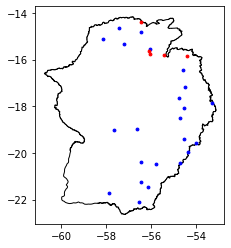

In [19]:
# Plotar a distribuição espacial das estações, utilizando o shapefile da bacia:

# Definindo a área de interesse como base do gráfico:
base = area_pantanal.plot(color='white', edgecolor='black')

# Plotando as estações automaticas em azul:
lista_inmet_pantanal[lista_inmet_pantanal.Type == 'Automatic'].plot(ax=base, marker='o', color='blue', markersize=8)

# Plotando as estações convencionais em vermelho:
lista_inmet_pantanal[lista_inmet_pantanal.Type == 'Conventional'].plot(ax=base, marker='o', color='red', markersize=8)

# 2. Fazendo o download dos dados

<p style='text-align: justify;'> 

<font color = 'blue'> Observações importantes:</font>
    
**(1)** Para o download dos dados do INMET a biblioteca HydroBR possui uma função para os dados com discretização horária e uma função para os dados com discretização diária;

    
**(2)** Diferentemente das funções que fazem download dos dados da ANA, para os dados do INMET o método realiza o download de apenas uma estação por vez, sendo fornecido o código da estação no formato de string.


**(3)** <font color = 'teal'> hydrobr.get_data.INMET.daily_data"</font>: Obtém os dados com discretização diária e funciona para códigos de estações manuais e de estações automáticas. Retornando um DataFrame com uma variável climática por coluna. Podendo retornar as seguintes variáveis:
    
    (3.1) Prec — Precipitação (mm)
    (3.2) Tmean — Temperatura média diária (ºC)
    (3.3) Tmax — Temperatura máxima (ºC)
    (3.4) Tmin — Temperatura mínima(ºC)
    (3.5) RH — Umidade relativa (%)
    (3.6) SD — Insolação (horas)

    
**(4)** <font color = 'teal'> hydrobr.get_data.INMET.hourly_data </font>: Obtém os dados com discretização horária e funciona apenas para códigos de estações automáticas. Retornando um DataFrame com uma variável climática por coluna. Podendo retornar as seguintes variáveis:
    
    (4.1) Tins — Temperatura instantânea (ºC)
    (4.2) Tmax — Temperatura máxima (ºC)
    (4.3) Tmin — Temperatura mínima(ºC)
    (4.4) RHins — Umidade relativa instantânea (%)
    (4.5) RHmax — Umidade relativa máxima (%)
    (4.6) RHmin — Umidade relativa mínima (%)
    (4.7) DPins — Temperatura do ponto de orvalho instantânea (ºC)
    (4.8) DPmax — Temperatura do ponto de orvalho máxima (ºC)
    (4.9) DPmin — Temperatura do ponto de orvalho mínima (ºC)
    (4.10) Pins — Pressão instantânea (hPa)
    (4.11) Pmax — Pressão máxima (hPa)
    (4.12) Pmin — Pressão mínima (hPa)
    (4.13) Wspeed — Velocidade do vento (m/s)
    (4.14) Wdir — Direção do vento (º)
    (4.15) Wgust — Rajada Máxima (vento) (m/s)
    (4.16) Radiação global (kJ/m²)
    (4.17) Prec — Precipitação (mm)
    
    
**(5)** A título de exemplo podemos realizar o download dos dados horários da estação automática de código A934 (a velocidade de download depende da conexão):

</p>

In [20]:
# Exemplo de download dos dados horários da estação automática A934 (Alto Taquari):
dados_at = hydrobr.get_data.INMET.hourly_data('A934')

# Visualização do formato do dataframe de saída:
dados_at.head()

6it [00:40,  6.81s/it]


,Tins,Tmax,Tmin,RHins,RHmax,RHmin,DPins,DPmax,DPmin,Pins,Pmax,Pmin,Wspeed,Wdir,Wgust,Rad,Prec
2008-01-30 10:00:00,19.7,19.7,19.4,98,98,97,19.3,19.3,19,910,910,909.2,2,292,5.2,13.628,0.4
2008-01-30 11:00:00,19.9,19.9,19.6,98,98,98,19.5,19.5,19.3,910.4,910.4,910,1.3,275,2.8,78.488,1.2
2008-01-30 12:00:00,20.4,20.4,19.9,97,98,97,19.9,19.9,19.5,910.8,910.8,910.4,3.3,253,4.9,191.673,0.4
2008-01-30 13:00:00,20.7,20.7,20.4,96,97,96,20,20.1,19.8,911.2,911.2,910.8,3.7,249,6,286.79,1.8
2008-01-30 14:00:00,20.7,20.8,20.4,95,97,95,19.9,20.2,19.6,911.3,911.4,911.2,4.9,292,7.2,539.706,1


<p style='text-align: justify;'> 

<font color = 'blue'> Observações importantes:</font>

**(i)** Caso esteja interessado em apenas algumas variáveis, é possível fazer um **for loop** que chama a função de download dos dados para uma lista de códigos de estações. Nesse caso, são criados DataFrames particulares para cada variável de interesse, que será preenchido utilizando o método **concat** da biblioteca Pandas.

    
**(ii)** Supanhamos que estamos interessados apenas nas variáveis de Precipitação e Temperatura Média, com discretização diária das estações automáticas que estão inseridas na bacia do Pantanal. Logo, poderíamos utilizar o seguinte código:
    
</p>

In [21]:
import pandas as pd

# Criando dataframes vazios:
dados_temperatura = pd.DataFrame()
dados_prec = pd.DataFrame()

#Selecionando apenas as estações automáticas:
lista_selecionada = lista_inmet_pantanal[lista_inmet_pantanal.Type == 'Automatic']

#Fazendo o download e salvando apenas as variáveis de precipitação e temperatura:
for code in lista_selecionada.Code.to_list():
    
    # Baixa os dados diários das estações a partir do código:
    dados = hydrobr.get_data.INMET.daily_data(code)
    
    # Salva apenas a coluna Tmean no dataframe criado, com o código da estação como nome:
    dados_temperatura = pd.concat([dados_temperatura,dados.Tmean.rename(code)], axis=1)
    
    # Salva apenas a coluna Prec no dataframe criado, com o código da estação como nome:
    dados_prec = pd.concat([dados_prec,dados.Prec.rename(code)], axis=1)

# 3. Visualizando a disponibilidade temporal dos dados

<p style='text-align: justify;'> 
    
Com o for loop anterior baixamos os dados de temperatura e precipitação das estações automáticas do Pantanal. Podemos visualizar a disponibilidade temporal dos dados de temperatura, a título de exemplo, utilizando o **gráfico de gantt**.

</p>

In [22]:
from plotly.offline import plot
gantt_fig = hydrobr.Plot.gantt(dados_temperatura)

#Atualizando o layout da figura:
gantt_fig.update_layout(
    autosize = False,
    width = 1000,
    height = 500,
    xaxis_title = 'Ano',
    yaxis_title = 'Código da Estação',
    font=dict(family="Courier New, monospace", size=12))

#Plotando:
plot(gantt_fig,filename='Diponibilidade temporal dos dados de temperatura' + '.html')

'Diponibilidade temporal dos dados de temperatura.html'

**Fonte:**

Adaptação de: <a href = "https://wallissoncarvalho.medium.com/utilizando-a-biblioteca-hydrobr-parte-2-42d54778bf08 " target = "_blank"> Utilizando a biblioteca HydroBR - Parte 2</a>.